# Welcome to Lesson 2: Exploring the Kismet Database
In this module, we'll explore how to query the Kismet database and extract data for processing with EtherEyes-Core.  The Kismet log file contains all the information gathered by Kismet about devices, supported phy types, packets, GPS coordinates during logging, and similar. 

Kismetdb Documentation: https://www.kismetwireless.net/docs/dev/kismetdb/

## Exploring kismetdb with Python3
This lesson uses **kismetdb** which has is installed on EtherEyes by default.  The original github repository is located at [python-kismet-db](https://github.com/kismetwireless/python-kismet-db) 

In [131]:
'''The "!" allows Jupyter notebook to execute commands locally. A sample kismet database
file has been provided for this exercise: Kismet-20210805-19-31-51-1.kismet'''
!ls

Kismet-20210805-19-31-51-1.kismet  log_to_pcap.py
Kismet-20210805-19-31-51-1.pcap    Querying_the_Kismetdb_Database.ipynb


## Extract All pcap packets from a Kismet database

The script log_to_pcap.py is the simplest way to extract pcap data from .kismetdb files. NOTE: The **start-time** and **end-time** switches use a quoted arguement in the following format: "YYYYMMDD HH:mm:SS"

In [132]:
!python3 log_to_pcap.py -h

usage: log_to_pcap.py [-h] [--in INFILE] [--out OUTFILE] [--outtitle OUTTITLE]
                      [--limit-packets LIMITPACKETS] [--source-uuid UUID]
                      [--start-time STARTTIME] [--end-time ENDTIME]
                      [--silent SILENT] [--min-signal MINSIGNAL]
                      [--device-key DEVICEKEY]

Kismet to Pcap Log Converter

options:
  -h, --help            show this help message and exit
  --in INFILE           Input (.kismet) file
  --out OUTFILE         Output filename (when exporting all packets)
  --outtitle OUTTITLE   Output title (when limiting packets per file)
  --limit-packets LIMITPACKETS
                        Generate multiple pcap files, limiting the number of
                        packets per file
  --source-uuid UUID    Limit packets to a specific data source (multiple
                        --source-uuid options will match multiple datasources)
  --start-time STARTTIME
                        Only convert packets recorded after 

### Querying All Packets from Sample file with log_to_pcap.py 

In [ ]:
!python3 log_to_pcap.py --in Kismet-20210805-19-31-51-1.kismet --out Kismet-20210805-19-31-51-1.pcap 

## Querying Packets From a Live EtherEyes Kismet Database
The live kismetdb for EtherEyes is located at /data/**hostname**/kismet/
where hostname is the hostname of your EtherEyes device.

In [126]:
import subprocess
import glob
import os

pcap_file = "/tmp/my_pcap.pcap" #path to save the pcap file to

In [127]:
# Retrieve the hostname for EtherEyes and the live kismetdb path and filename
hostname = os.uname()[1]
kismet_db = glob.glob("/data/"+hostname+"/kismet/*.kismet")[0]

## Extracting all packets to a pcap file

In [ ]:
# Extract packets from the live kismetdb database
result = subprocess.run(["python3","/home/ethereyes/python-kismet-db/kismetdb/scripts/log_to_pcap.py","--in",kismet_db,"--out",pcap_file], capture_output=True)
print(result.stdout.decode())

## Extracting packets from last 10 minutes to a pcap file

In [129]:
from datetime import datetime, timedelta

now = datetime.now()
ten_minutes_ago = now - timedelta(minutes=10)
formatted_time = ten_minutes_ago.strftime("%Y%m%d %H:%M:%S")

print(formatted_time)

20240210 17:47:22


In [130]:
# Extract packets from the live kismetdb database
result = subprocess.run(["python3","/home/ethereyes/python-kismet-db/kismetdb/scripts/log_to_pcap.py","--in",kismet_db,"--out",pcap_file,"--start-time",formatted_time], capture_output=True)
print(result.stdout.decode())

DLT 0 for all packets
Logging to /tmp/my_pcap.pcap
Converted 1000 packets...
Converted 2000 packets...
Converted 3000 packets...
Converted 4000 packets...
Converted 5000 packets...
Converted 6000 packets...
Converted 7000 packets...
Done! Converted 7465 packets.



## Retrieve all Information for a Specific MAC Address
Open the Kismet WebUI on EtherEyes http://127.0.0.1:2501 and select a Device to analyze.
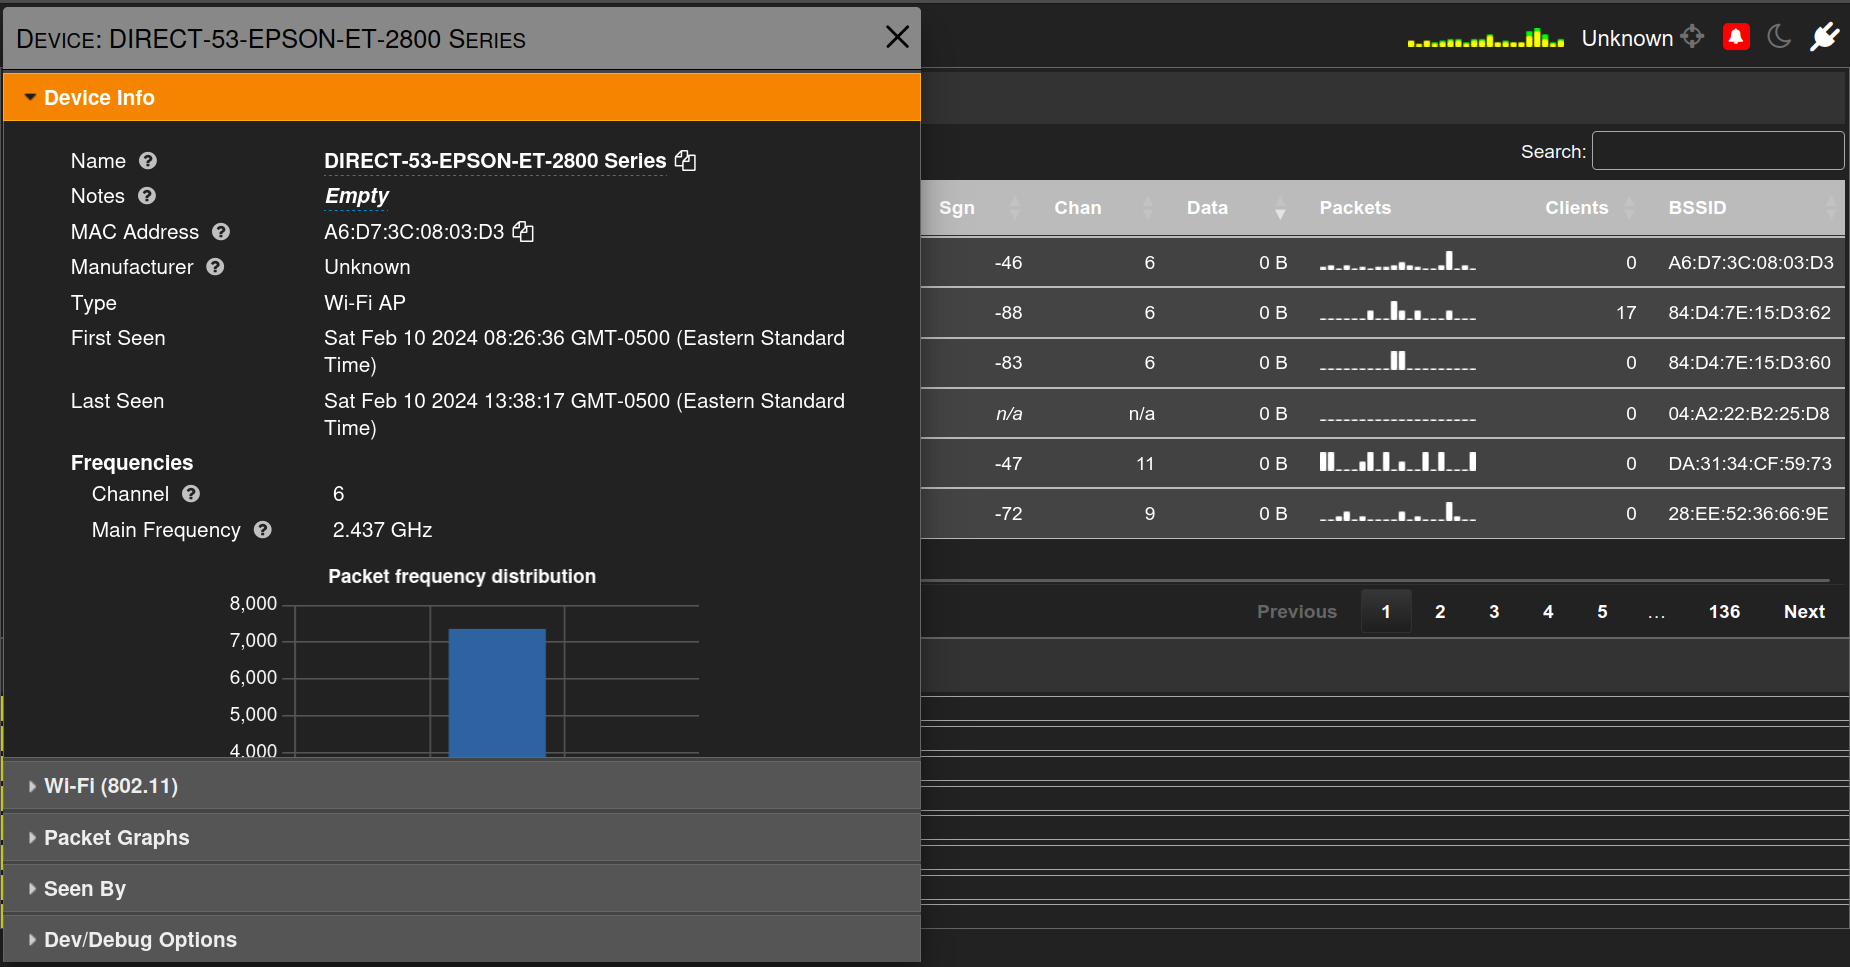

### Query the Kismet API for a Target MAC Address


In [181]:
MAC_addr = "A6:D7:3C:08:03:D3"

In [188]:
import requests

url = "http://localhost:2501/devices/by-mac/"+MAC_addr+"/devices.ekjson"
username = "ethereyes"
password = "ethereyes"

response = requests.get(url, auth=(username, password))

if response.status_code == 200:
    # Successful response
    data = response.json()  # Assuming JSON response
    print(data)
else:
    # Handle error
    print("Request failed with status code:", response.status_code)


{'kismet_device_base_first_time': 1707571596, 'kismet_device_base_macaddr': 'A6:D7:3C:08:03:D3', 'dot11_device': {'dot11_device_client_disconnects_last': 0, 'dot11_device_num_probed_ssids': 0, 'dot11_device_neighbor_report_capable': 0, 'dot11_device_last_bssid': 'A6:D7:3C:08:03:D3', 'dot11_device_wps_m3_last': 0, 'dot11_device_num_advertised_ssids': 1, 'dot11_device_last_beaconed_ssid_record': {'dot11_advertisedssid_ssidlen': 30, 'dot11_advertisedssid_cloaked': 0, 'dot11_advertisedssid_ccx_txpower': 0, 'dot11_advertisedssid_cisco_client_mfp': 0, 'dot11_advertisedssid_dot11e_qbss': 0, 'dot11_advertisedssid_probe_response': 0, 'dot11_advertisedssid_ht_center_1': 0, 'dot11_advertisedssid_maxrate': 72.2, 'dot11_advertisedssid_beacon': 1, 'dot11_advertisedssid_ietag_checksum': 2933277942, 'dot11_advertisedssid_ht_center_2': 0, 'dot11_advertisedssid_ssid_hash': 2885337527, 'dot11_advertisedssid_ht_mode': 'HT20', 'dot11_advertisedssid_first_time': 1707571596, 'dot11_advertisedssid_beaconrate'